### Research Objectives:
1. Determine the relationship between the students’ debugging scores and the quality of discourse
2. Determine the performance distribution given the respective achievement level of the pair programmers

#### Relationship between students’ debugging performances with respect to his/her discourse quality
- Correlate the debugging scores and discourse quality such as the discourse classes and volume
- Fit a regression model and determine levels of contribution of variables to the debugging score
- Replicate the aforementioned steps but using differences of debugging scores of the pair programmers

### to try:
- group acts by main acts: inf, res, imp, eli, arg
- group by sex
- group by dynamic, static

In [1]:
# Importing packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

/home/jerelyn/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Directories
data_dir = "data/"
data_proc_dir = data_dir + "proc/"

In [3]:
stud_df = pd.read_csv(data_proc_dir + "student_data.csv", index_col="student").dropna()

In [4]:
stud_df.head()

,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,EliOpn,EliPrp,EliSet,EliVer,ImpAct,...,ResSol,ResStm,nlines,school,static_or_dynamic,individual_or_pair,gender,pre_test_score,self_efficacy,debugging_scores
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,3.0,4.0,...,1.0,1.0,38,ADDU,Dynamic,Pair,M,8.0,5.53,25.0
ADDU-DP01B,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,...,3.0,2.0,32,ADDU,Dynamic,Pair,M,9.0,5.56,22.0
ADDU-DP03A,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9,ADDU,Dynamic,Pair,M,8.0,5.06,17.0
ADDU-DP03B,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,1.0,1.0,10,ADDU,Dynamic,Pair,F,4.0,3.53,10.0
ADDU-DP07A,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,6.0,...,1.0,5.0,48,ADDU,Dynamic,Pair,M,5.0,3.78,19.0


In [5]:
cols_classes = ['ArgCcl', 'ArgCnt', 'ArgCon', 'ArgEla', 'ArgRsn', 'EliOpn', 'EliPrp', 'EliSet', 'EliVer',
                'ImpAct', 'ImpFoc', 'InfAct', 'InfNeg', 'InfNeu', 'InfNon', 'InfPos', 'InfSoc', 'InfSol',
                'InfStm', 'ResCfm', 'ResDen','ResSol', 'ResStm']
class_group = ['Arg', 'Eli', 'Imp', 'Inf', 'Res']
cols_classes_groups = ['grp_' + grp for grp in class_group]
cols_tests = ['pre_test_score', 'self_efficacy', 'debugging_scores']

In [6]:
for group in class_group:
    stud_df['grp_' + group] = stud_df[stud_df.columns[pd.Series(stud_df.columns).str.startswith(group)]].sum(1)
    
stud_df[cols_classes_groups + cols_classes]

,grp_Arg,grp_Eli,grp_Imp,grp_Inf,grp_Res,ArgCcl,ArgCnt,ArgCon,ArgEla,ArgRsn,...,InfNeu,InfNon,InfPos,InfSoc,InfSol,InfStm,ResCfm,ResDen,ResSol,ResStm
student,,,,,,,,,,,,,,,,,,,,,
ADDU-DP01A,1.0,7.0,7.0,18.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.0,2.0,1.0,2.0,3.0,0.0,1.0,1.0
ADDU-DP01B,0.0,3.0,4.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,3.0,5.0,4.0,0.0,3.0,2.0
ADDU-DP03A,1.0,3.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
ADDU-DP03B,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0
ADDU-DP07A,0.0,5.0,7.0,23.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,7.0,0.0,5.0,7.0,0.0,1.0,5.0
ADDU-DP07B,1.0,17.0,5.0,23.0,11.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,3.0,12.0,4.0,4.0,0.0,7.0,0.0
ADDU-DP08A,0.0,9.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
ADDU-DP08B,0.0,1.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0
ADDU-SP01A,0.0,2.0,3.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,3.0


## Correlation

In [7]:
def showCorrelatioMatrix(data, columns):
    plt.figure(figsize=(14,10))
    cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
    corr_res = data[columns].corr()
    ax = sns.heatmap(corr_res, cmap=cmap)
    ax.tick_params(labelsize=20)
    plt.xticks(rotation=90)
    return ax

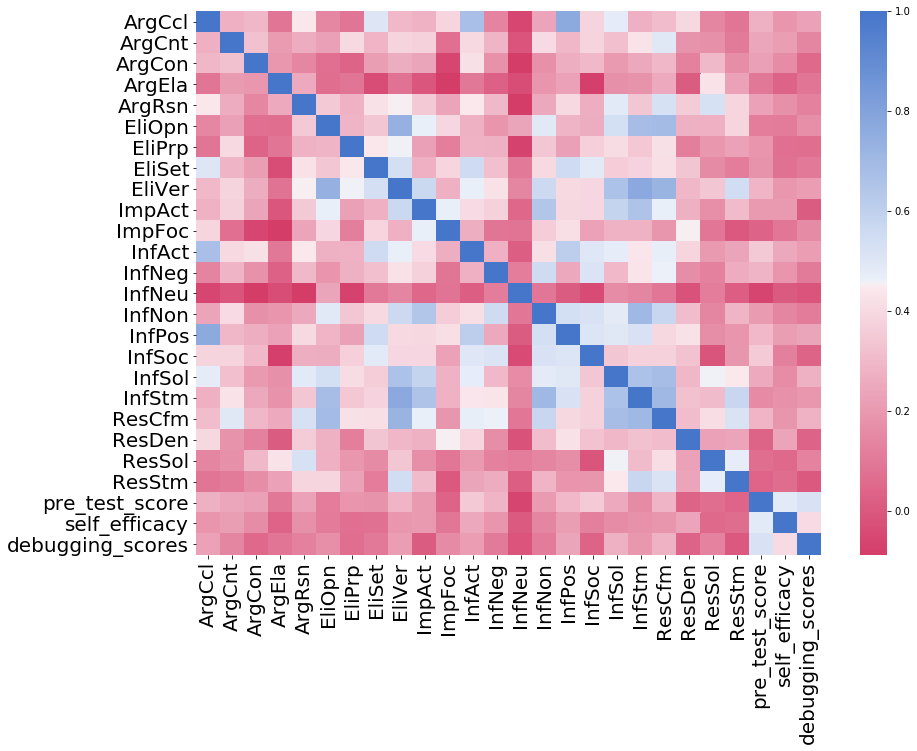

In [8]:
ax = showCorrelatioMatrix(stud_df, cols_classes + cols_tests)

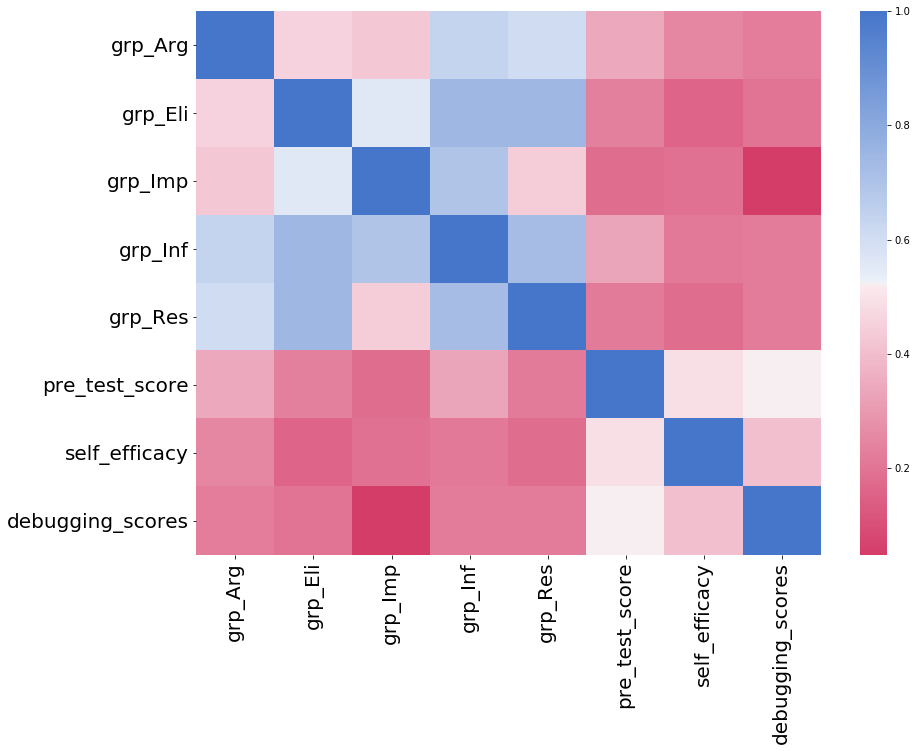

In [9]:
ax = showCorrelatioMatrix(stud_df, cols_classes_groups + cols_tests)

In [15]:
def showPairGrid(data, columns, hue):
    plt.figure(figsize=(14,10))

    sns.set(style="white")

    g = sns.PairGrid(data[columns], hue=hue, diag_sharey=False)
    g.map_lower(sns.kdeplot)
    g.map_upper(sns.scatterplot)
    g.map_diag(sns.kdeplot, lw=3)
    g.add_legend()
    plt.xticks(rotation=90)

In [ ]:
showPairGrid(stud_df, cols_classes_groups+cols_tests + ['school'], 'school')

## Training Prep

In [ ]:
# pred vs actual viz
def pred_vs_actual_viz():
    start = min(min(y_test), min(y_pred)) - 10 # minus 10 for buffer
    end = max(max(y_test), max(y_pred)) + 10 # added 10 for buffer
    line_coordinates = np.arange(start,end)

    plt.scatter(y_pred, y_test, s=30, c='r', marker='+', zorder=10)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.xlim(start, end)
    plt.ylim(start, end)
    plt.plot(line_coordinates,line_coordinates)
    plt.show()
    print("MSE: {}".format(metrics.mean_squared_error(y_pred, y_test)))

In [ ]:
def trainPrep(data, x_cols, y_col):
    #setting x and y
    X = stud_df[x_cols]
    y = stud_df[y_col]
    
    # Train-test split
    # !! Important to split the data first to train-test before cross validation to avoid data leakage
    train_perc = 0.8
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_perc)

    X_train.reset_index(inplace=True, drop=True)
    y_train = y_train.values
    X_test.reset_index(inplace=True, drop=True)
    y_test = y_test.values


    print("Train set shape: {}".format(X_train.shape))
    print("Test set shape: {}".format(X_test.shape))
    
    # Scaling predictors (X_train)
    scaler = preprocessing.MinMaxScaler()
    scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(scaled, columns=X_train.columns)
    
    return X_train, X_test, y_train, y_test, scaler

## Regression

In [ ]:
def useRegression(X_train, X_test, y_train, y_test, scaler, print_summary = True):
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit() # with constant
    y_pred = model.predict(scaler.fit_transform(sm.add_constant(X_test)))

    print(model.summary())
    
    return y_pred

In [ ]:
def useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler, print_summary=True):
    model = sm.OLS(y_train, X_train).fit() # without constant
    y_pred = model.predict(scaler.fit_transform(X_test))

    print(model.summary())
    
    return y_pred

### Regression using action categories and other test scores, dependent variable is debugging score

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes + ['pre_test_score', 'self_efficacy'], y_col = 'debugging_scores')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

### Regression using action categories and other test scores, dependent variable is debugging score without constant

In [ ]:
y_pred = useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

### Regression using action categories, dependent variable is debugging score

In [ ]:
X_train = X_train.drop(['pre_test_score', 'self_efficacy'], axis=1)
X_test = X_test.drop(['pre_test_score', 'self_efficacy'], axis=1)

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

### Regression using action categories and other test scores, dependent variable is debugging score without constant

In [ ]:
y_pred = useRegressionWithoutConstant(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

### Other tests

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes, y_col = 'pre_test_score')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = stud_df, x_cols = cols_classes, y_col = 'self_efficacy')
y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

## Difference in testing scores

In [ ]:
temp_remove_pair = {'ADDU-DP02', 'ADDU-SP04'} 
unique_pairs = set(stud_df.index.str[:-1]) - temp_remove_pair
pair_df = pd.DataFrame(index=unique_pairs, columns=cols_classes + cols_tests + ['school', 'static_or_dynamic', 'gender'])

for pair in unique_pairs:
    pair_df.loc[pair][cols_tests] = stud_df.loc[pair + 'A'].get(cols_tests).subtract(stud_df.loc[pair + 'B'].get(cols_tests)).abs()
    pair_df.loc[pair][cols_classes] = stud_df.loc[pair + 'A'].get(cols_classes).add(stud_df.loc[pair + 'B'].get(cols_classes))
    pair_df.loc[pair][['school', 'static_or_dynamic', 'gender']] = stud_df.loc[pair + 'A'][['school', 'static_or_dynamic', 'gender']]
    
pair_df[cols_classes + cols_tests] = pair_df[cols_classes + cols_tests].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='school', y='debugging_scores', hue='static_or_dynamic',  data=pair_df)

In [ ]:
showCorrelatioMatrix(pair_df, cols_classes+cols_tests)

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'debugging_scores')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'pre_test_score')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()

In [ ]:
X_train, X_test, y_train, y_test, scaler = trainPrep(data = pair_df, x_cols = cols_classes , y_col = 'self_efficacy')

y_pred = useRegression(X_train, X_test, y_train, y_test, scaler)

In [ ]:
pred_vs_actual_viz()